# EDA + Feature Engineering 

## 1. Import

In [75]:
import pandas as pd
import numpy as np

## 2. Data Load

In [76]:
train = pd.read_csv('/kaggle/input/lg-aimers/train.csv').drop(columns=['ID'])
test = pd.read_csv('/kaggle/input/lg-aimers/test.csv').drop(columns=['ID'])
submission = pd.read_csv('/kaggle/input/lg-aimers/sample_submission.csv')

In [4]:
train.shape, test.shape

((256351, 68), (90067, 67))

## 3. Data View

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256349 non-null  object 
 5   배란 자극 여부               256351 non-null  int64  
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            250060 non-null  float64
 8   착상 전 유전 검사 사용 여부       2718 non-null    float64
 9   착상 전 유전 진단 사용 여부       250060 non-null  float64
 10  남성 주 불임 원인             256351 non-null  int64  
 11  남성 부 불임 원인             256351 non-null  int64  
 12  여성 주 불임 원인             256351 non-null  int64  
 13  여성 부 불임 원인             256351 non-null  int64  
 14  부부 주 불임 원인             256351 non-nu

### target distribution

<Axes: xlabel='임신 성공 여부', ylabel='count'>

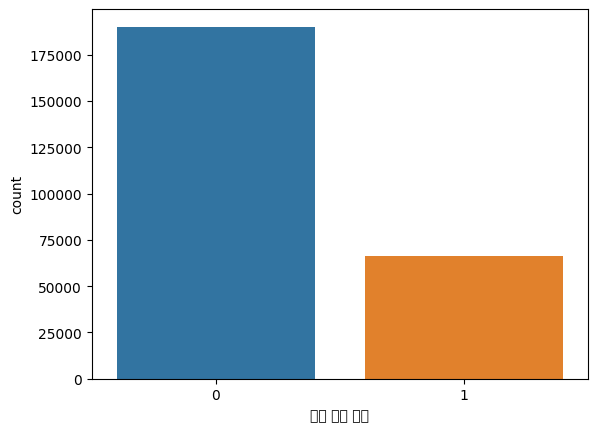

In [6]:
import warnings
import seaborn as sns

warnings.filterwarnings("ignore", category=UserWarning)
sns.countplot(x='임신 성공 여부', data=train)

## feature summary

In [7]:
binary_features = [
    '배란 자극 여부',
    '단일 배아 이식 여부',
    '착상 전 유전 검사 사용 여부',
    '착상 전 유전 진단 사용 여부',
    '남성 주 불임 원인',
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [22]:
train[binary_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   배란 자극 여부            256351 non-null  int64  
 1   단일 배아 이식 여부         250060 non-null  float64
 2   착상 전 유전 검사 사용 여부    2718 non-null    float64
 3   착상 전 유전 진단 사용 여부    250060 non-null  float64
 4   남성 주 불임 원인          256351 non-null  int64  
 5   남성 부 불임 원인          256351 non-null  int64  
 6   여성 주 불임 원인          256351 non-null  int64  
 7   여성 부 불임 원인          256351 non-null  int64  
 8   부부 주 불임 원인          256351 non-null  int64  
 9   부부 부 불임 원인          256351 non-null  int64  
 10  불명확 불임 원인           256351 non-null  int64  
 11  불임 원인 - 난관 질환       256351 non-null  int64  
 12  불임 원인 - 남성 요인       256351 non-null  int64  
 13  불임 원인 - 배란 장애       256351 non-null  int64  
 14  불임 원인 - 여성 요인       256351 non-null  int64  
 15  불임 원인 - 자궁경부 문제     256351 non-nul

In [10]:
train[binary_features].isnull().sum()

배란 자극 여부                   0
단일 배아 이식 여부             6291
착상 전 유전 검사 사용 여부      253633
착상 전 유전 진단 사용 여부        6291
남성 주 불임 원인                 0
남성 부 불임 원인                 0
여성 주 불임 원인                 0
여성 부 불임 원인                 0
부부 주 불임 원인                 0
부부 부 불임 원인                 0
불명확 불임 원인                  0
불임 원인 - 난관 질환              0
불임 원인 - 남성 요인              0
불임 원인 - 배란 장애              0
불임 원인 - 여성 요인              0
불임 원인 - 자궁경부 문제            0
불임 원인 - 자궁내막증              0
불임 원인 - 정자 농도              0
불임 원인 - 정자 면역학적 요인         0
불임 원인 - 정자 운동성             0
불임 원인 - 정자 형태              0
동결 배아 사용 여부             6291
신선 배아 사용 여부             6291
기증 배아 사용 여부             6291
대리모 여부                  6291
PGD 시술 여부             254172
PGS 시술 여부             254422
dtype: int64

In [11]:
len(binary_features)

27

In [12]:
ordinal_features = [
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수"
]

In [23]:
train[ordinal_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   총 시술 횟수        256351 non-null  object
 1   클리닉 내 총 시술 횟수  256351 non-null  object
 2   IVF 시술 횟수      256351 non-null  object
 3   DI 시술 횟수       256351 non-null  object
 4   총 임신 횟수        256351 non-null  object
 5   IVF 임신 횟수      256351 non-null  object
 6   DI 임신 횟수       256351 non-null  object
 7   총 출산 횟수        256351 non-null  object
 8   IVF 출산 횟수      256351 non-null  object
 9   DI 출산 횟수       256351 non-null  object
dtypes: object(10)
memory usage: 19.6+ MB


In [14]:
train[ordinal_features].isnull().sum()

총 시술 횟수          0
클리닉 내 총 시술 횟수    0
IVF 시술 횟수        0
DI 시술 횟수         0
총 임신 횟수          0
IVF 임신 횟수        0
DI 임신 횟수         0
총 출산 횟수          0
IVF 출산 횟수        0
DI 출산 횟수         0
dtype: int64

In [13]:
len(ordinal_features)

10

In [15]:
categorical_features = [
    "시술 시기 코드",
    "시술 당시 나이",
    "특정 시술 유형",
    "배란 유도 유형",
    "배아 생성 주요 이유",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
]

In [24]:
train[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   시술 시기 코드     256351 non-null  object
 1   시술 당시 나이     256351 non-null  object
 2   특정 시술 유형     256349 non-null  object
 3   배란 유도 유형     256351 non-null  object
 4   배아 생성 주요 이유  250060 non-null  object
 5   난자 출처        256351 non-null  object
 6   정자 출처        256351 non-null  object
 7   난자 기증자 나이    256351 non-null  object
 8   정자 기증자 나이    256351 non-null  object
dtypes: object(9)
memory usage: 17.6+ MB


In [17]:
train[categorical_features].isnull().sum()

시술 시기 코드          0
시술 당시 나이          0
특정 시술 유형          2
배란 유도 유형          0
배아 생성 주요 이유    6291
난자 출처             0
정자 출처             0
난자 기증자 나이         0
정자 기증자 나이         0
dtype: int64

In [16]:
len(categorical_features)

9

In [18]:
numeric_features = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

In [25]:
train[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 1   총 생성 배아 수              250060 non-null  float64
 2   미세주입된 난자 수             250060 non-null  float64
 3   미세주입에서 생성된 배아 수        250060 non-null  float64
 4   이식된 배아 수               250060 non-null  float64
 5   미세주입 배아 이식 수           250060 non-null  float64
 6   저장된 배아 수               250060 non-null  float64
 7   미세주입 후 저장된 배아 수        250060 non-null  float64
 8   해동된 배아 수               250060 non-null  float64
 9   해동 난자 수                250060 non-null  float64
 10  수집된 신선 난자 수            250060 non-null  float64
 11  저장된 신선 난자 수            250060 non-null  float64
 12  혼합된 난자 수               250060 non-null  float64
 13  파트너 정자와 혼합된 난자 수       250060 non-null  float64
 14  기증자 정자와 혼합된 난자 수       250060 non-nu

In [19]:
train[numeric_features].isnull().sum()

임신 시도 또는 마지막 임신 경과 연수    246981
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: int64

In [20]:
len(numeric_features)

20

In [21]:
target_feature = ["임신 성공 여부"]

## 4. Feature Engineering

In [80]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(5, 5)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.6, hspace=0.6)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='임신 성공 여부', data=df, palette='Set2', ax=ax)

In [85]:
train["메롱메롱"] = train["특정 시술 유형"].apply(lambda x: 
    "ICSI" if "ICSI" in str(x) else 
    "IVF" if "IVF" in str(x) else 
    "IUI" if "IUI" in str(x) else 
    "Other"
)

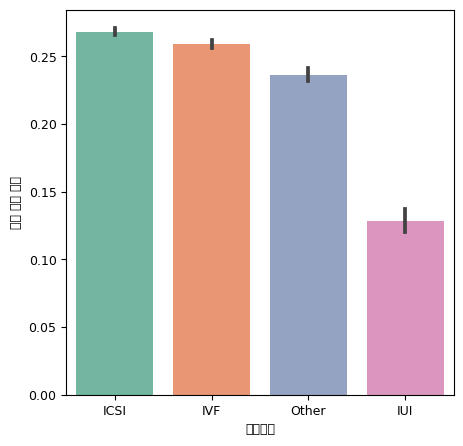

In [88]:
plot_target_ratio_by_features(train, ['메롱메롱'], 1, 1)

In [92]:
train['메롱메롱'].value_counts(normalize=True, dropna=False) * 100

메롱메롱
ICSI     50.144918
IVF      36.890045
Other    10.585486
IUI       2.379550
Name: proportion, dtype: float64

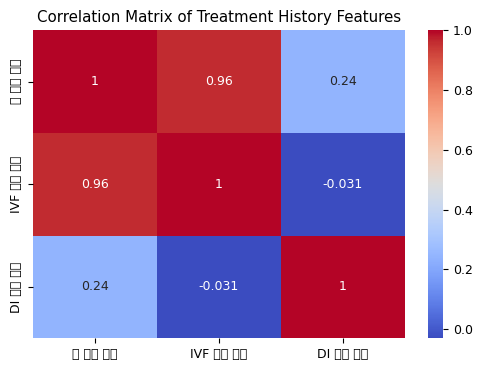

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_convert = ["총 임신 횟수", 'IVF 임신 횟수', 'DI 임신 횟수']
for col in columns_to_convert:
    train[col] = train[col].astype(str).str.replace("회", "").str.replace("이상", "")


correlation_matrix = train[columns_to_convert].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Treatment History Features")
plt.show()

In [115]:
train["male_infertility"] = (
    train["남성 주 불임 원인"] + 
    train["남성 부 불임 원인"] + 
    train["불임 원인 - 남성 요인"] + 
    train["불임 원인 - 정자 농도"] + 
    train["불임 원인 - 정자 면역학적 요인"] + 
    train["불임 원인 - 정자 운동성"] + 
    train["불임 원인 - 정자 형태"]
).apply(lambda x: 1 if x > 0 else 0)

train["female_infertility"] = (
    train["여성 주 불임 원인"] + 
    train["여성 부 불임 원인"] + 
    train["불임 원인 - 난관 질환"] + 
    train["불임 원인 - 배란 장애"] + 
    train["불임 원인 - 여성 요인"] + 
    train["불임 원인 - 자궁경부 문제"] + 
    train["불임 원인 - 자궁내막증"]
).apply(lambda x: 1 if x > 0 else 0)

In [116]:
col_name = 'male_infertility'
train[col_name].value_counts(normalize=True, dropna=False) * 100

male_infertility
0    60.581
1    39.419
Name: proportion, dtype: float64

In [117]:
col_name = 'female_infertility'
train[col_name].value_counts(normalize=True, dropna=False) * 100

female_infertility
0    66.305963
1    33.694037
Name: proportion, dtype: float64

In [119]:
train["couple_infertility"] = (
    train["부부 주 불임 원인"] + 
    train["부부 부 불임 원인"]
).apply(lambda x: 1 if x > 0 else 0)

col_name = 'couple_infertility'
train[col_name].value_counts(normalize=True, dropna=False) * 100

couple_infertility
0    95.819014
1     4.180986
Name: proportion, dtype: float64

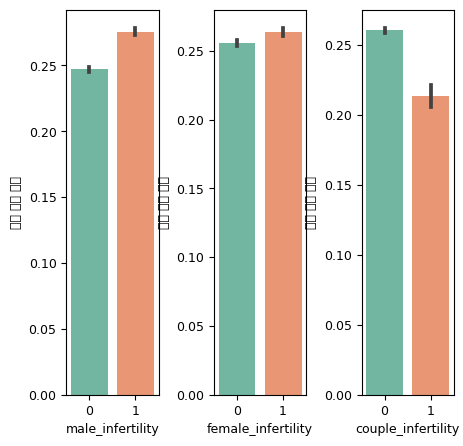

In [121]:
plot_target_ratio_by_features(train, ['male_infertility', 'female_infertility', 'couple_infertility'], 1, 3)